In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preparation

In [16]:
C7_1 = pd.read_csv('C7-1.csv')

In [17]:
train = C7_1['L_10']

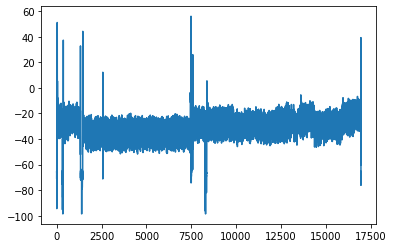

In [18]:
plt.plot(train)

# Denoising High Freqency
---
Remove high frequency and inverse transformed it

In [19]:
N = len(train)

In [20]:
freq = np.fft.fft(train)

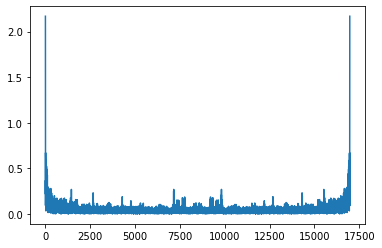

In [21]:
plt.plot(np.abs(freq[1:])/N)

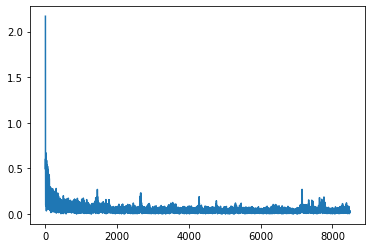

In [22]:
plt.plot(np.abs(freq[1:int(N/2+1)])/N)

In [23]:
print(len(freq), len(train))

16973 16973


In [24]:
for i in range(len(freq)):
    bound = 7500
    if (i < int(N/2)+1+bound) & (i > int(N/2)+1-bound):
        freq[i] = 0

(0, 1)

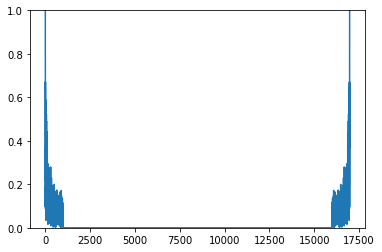

In [25]:
plt.plot(np.abs(freq[1:])/N)
plt.ylim(0,1)

(0, 1)

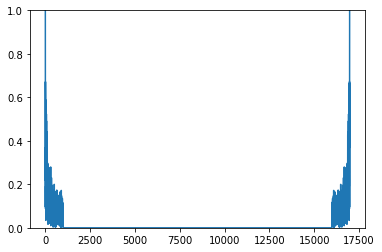

In [26]:
plt.plot(np.abs(freq)/N)
plt.ylim(0,1)

Text(0.5, 1.0, 'Raw Signal')

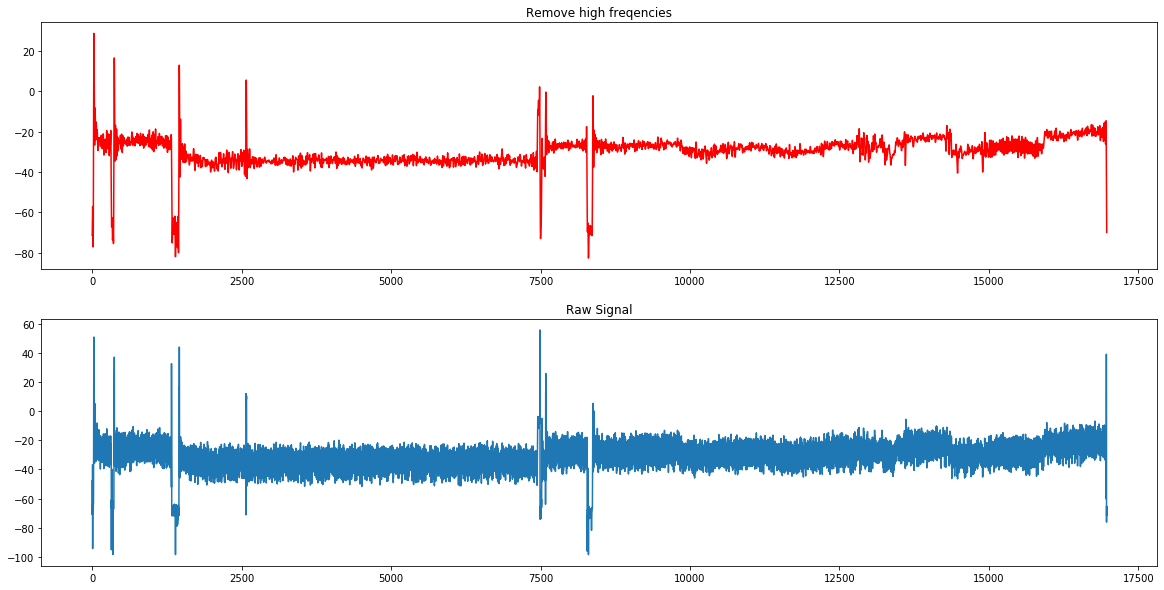

In [27]:
fig, ax = plt.subplots(2, figsize=(20,10))

ax[0].plot(np.fft.ifft(freq), color='red')
ax[0].set_title('Remove high freqencies')
ax[1].plot(train)
ax[1].set_title('Raw Signal')

# Denoising Low Freqency

In [28]:
freq = np.fft.fft(train)

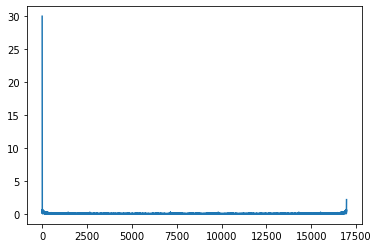

In [29]:
plt.plot(np.abs(freq[:])/N)

In [30]:
low_freq_removed = freq.copy()

for i in range(len(low_freq_removed)):
    bound = 6000
    if i > 0:
        if ((i > int(N/2)+1+bound) | (i < int(N/2)+1-bound)):
            low_freq_removed[i] = 0

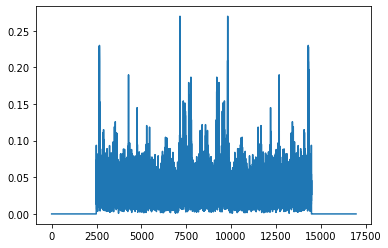

In [31]:
plt.plot(np.abs(low_freq_removed[1:])/N)

Text(0.5, 1.0, 'Raw Signal')

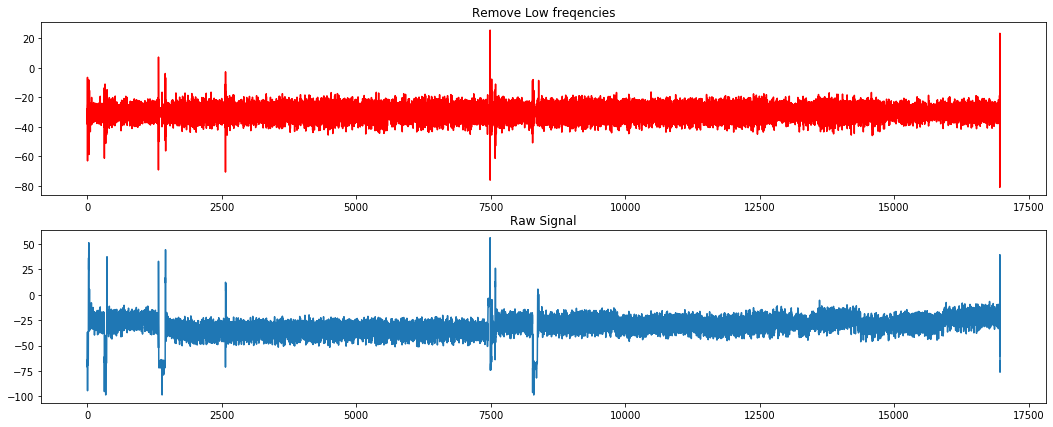

In [32]:
fig, ax = plt.subplots(2, figsize=(18,7))

ax[0].plot(np.fft.ifft(low_freq_removed), color='red')
ax[0].set_title('Remove Low freqencies')
ax[1].plot(train)
ax[1].set_title('Raw Signal')

# Remove Certain range of Freqency

4986.5


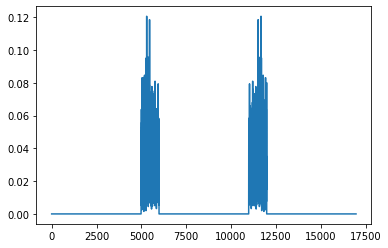

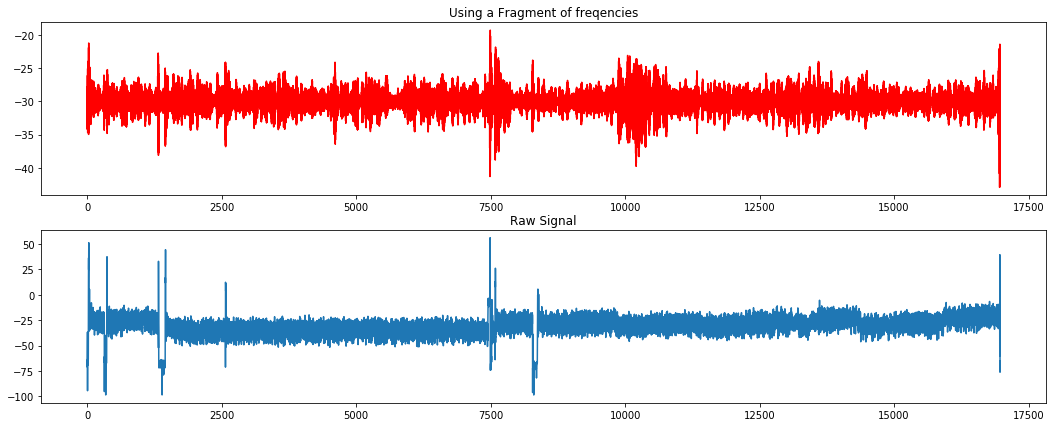

In [33]:
freq_removed = freq.copy()

for i in range(len(freq_removed)):
    bound = 500 #freq boundary you want to remove
    pos = 3000 #freq position you want to remove: position from middle point of fourier transformed values
    if i > 0: #Include Mean of Raw Data
        if not ((i > int(N/2)+1+pos+bound) | (i < int(N/2)+1+pos-bound)) ^ ((i > int(N/2)+1-pos+bound) | (i < int(N/2)+1-pos-bound)):
            freq_removed[i] = 0
            
plt.plot(np.abs(freq_removed[1:])/N)

fig, ax = plt.subplots(2, figsize=(18,7))

ax[0].plot(np.fft.ifft(freq_removed), color='red')
ax[0].set_title('Using a Fragment of freqencies')
ax[1].plot(train)
ax[1].set_title('Raw Signal')

print(len(freq)/2-pos-500)